# Part 2

In [1]:
class Data:
    def __init__(self, beta, gamma, tau, n, x0):
        self.beta = beta
        self.gamma = gamma
        self.tau = tau
        self.n = n
        self.x0 = x0
        self.mac_glass_output = []
        self.mac_glass_output.append(x0)

    def gen_mackey_glass(self, t):
        for i in range(1, t):
            if i - 25 < 0:
                x_old = 0
            else: 
                x_old = self.mac_glass_output[i-25]

            x_next = self.mac_glass_output[-1] + (self.beta*x_old)/(1+x_old**10) - 0.1*self.mac_glass_output[-1] 
            self.mac_glass_output.append(x_next)

    def gen_data_set(self, data_range, data_shifts):
        num_of_pts = data_range[1]-data_range[0]
        self.x = []
        for i in range(0, len(data_shifts)):
            start = data_range[0]+data_shifts[i]
            stop = data_range[1]+data_shifts[i]+1
            self.x.append(self.mac_glass_output[start:stop])
        
        self.x = np.array(self.x).T


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# data parameters
beta = 0.2
gamma = 0.1
tau = 25
n = 10
x0 = 1.5
t_total = 1600

t = np.arange(301, 310, 1, dtype=float)
data = Data(beta, gamma, tau, n, x0)
data.gen_mackey_glass(t_total)

data_range = [301,1500]
data_shifts = [-20, -15, -10, -5, 0]

data.gen_data_set(data_range, data_shifts)
_input = data.x
temp = np.ones((np.shape(_input)[0], np.shape(_input)[1]+1))*-1
temp[:,:-1] = _input
_input = temp

data_shifts = [5]
data.gen_data_set(data_range, data_shifts)
_output = data.x

# input data
# np.random.shuffle(_input[0:1000])
input_training_data = _input[0:500, :]
input_testing_data = _input[500:1000, :]
input_validation_data = _input[1000:1200, :]
# input_training_data = _input[0::2, :]
# input_testing_data = _input[1::4, :]
# input_validation_data = _input[3::4, :]
# output data
output_training_data = _output[0:500, :]
output_testing_data = _output[500:1000, :]
output_validation_data = _output[1000:1200, :]
# output_training_data = _output[0::2, :]
# output_testing_data = _output[1::4, :]
# output_validation_data = _output[3::4, :]

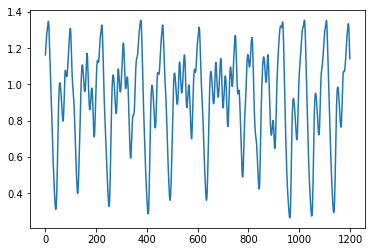

In [4]:
plt.figure()
plt.plot(_output)
plt.show() 

In [5]:
np.shape(output_training_data)

(500, 1)

# The Network

In [30]:
import numpy as np
import tensorflow as tf 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

# # The perceptron 
num_units = 1
num_inputs = 5 + 1 # +1 for bias
num_hidden_nodes = 4 
num_ouputs = 1

# Parameters
learning_rate = 0.2
epochs = 20
beta = 2 # for activations
# not using below, because using entire training per epoch
batch_size = 20
total_num_batches = int(input_training_data.shape[0]/batch_size) # 10 batches 

# these are placeholder variables that are assigned values later
# x now has many rows but num_inputs = columns (y is also defined)
x = tf.placeholder(tf.float32, [None, num_inputs])
# h = tf.placeholder(tf.float32, [None, num_hidden_nodes+1])
y = tf.placeholder(tf.float32, [None, num_ouputs])
# +1 for bias already included
input_weights = tf.Variable(tf.random_normal([num_inputs, num_hidden_nodes])) 
hidden_weights = tf.Variable(tf.random_normal([num_hidden_nodes+1, num_ouputs])) 

# biases for inputs and activations
input_bias = tf.Variable(tf.random_normal([num_hidden_nodes]))
hidden_bias = tf.Variable(tf.random_normal([num_ouputs]))

In [31]:
tf.matmul(x, input_weights)

<tf.Tensor 'MatMul_6:0' shape=(?, 4) dtype=float32>

In [32]:
input_bias

<tf.Variable 'Variable_17:0' shape=(4,) dtype=float32_ref>

In [33]:
# activation_fxn(x*weights + b), a_fxn is a sigmoid?
hid_output_b4_act = tf.matmul(x, input_weights)
hid_output = 1/(1+tf.math.exp(-beta*hid_output_b4_act))


out_output_b4_act = tf.add(tf.matmul(hid_output, hidden_weights), hidden_bias) 
output = tf.sigmoid(output_b4_act)

ValueError: Dimensions must be equal, but are 4 and 5 for '{{node MatMul_8}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](truediv_1, Variable_16/read)' with input shapes: [?,4], [5,1].

In [8]:
# cost or error function
cost_output = tf.reduce_mean(output - y)
cost_hidden = tf.reduce_mean(h*(1-h)*cost_output*hidden_weights)

# cost_output = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=output)).

# optimizer- grad descent
# maybe put these in one?
grad_descent_output = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_output)
grad_descent_hidden = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_hidden)

NameError: name 'output' is not defined

In [9]:
init = tf.global_variables_initializer()
avg_set = []
epoch_set = []
weight_set = []

with tf.Session() as sess:
    # init vars for session
    sess.run(init)

    # iterate through epochs (num of times through data) and batch to
    for e in range(epochs):
        avg_cost = 0

        x_batch = input_training_data
        y_batch = output_training_data

        # Fit training data
        _,c = sess.run([grad_descent_output, cost_output], feed_dict={x: x_batch, y: y_batch})
        # Compute average loss
        avg_cost += c/total_num_batches
    print(c)
    epoch_set.append(e+1)
    avg_set.append(avg_cost)
    weight_set.append(weights.eval())
    # print("Epoch: ", e+1, " Loss: ", avg_cost)
    
    print("Training Complete.")
    # test model using the first couple of values (usually should not do this)
    # predictions = output.eval({x:inputs[:10]})
    # print(inputs[:10])
    # print(predictions)
    sess.close()

NameError: name 'grad_descent_output' is not defined

In [10]:
import tensorflow as tf
tf.__version__

#tensorflow 1.x
# self._states = tf.placeholder(shape=[None, self._num_states], dtype=tf.float32)
#tensorflow 2.x
_num_states = 2
# _states = tf.Variable(tf.ones(shape=[None, _num_states]), dtype=tf.float32)

In [11]:
import tensorflow as tf

print(tf.version.VERSION)

2.3.0
